## Question 1 

### Part a) 

In [64]:
import numpy as np 

In [65]:
# Initilize the constants 
gamma_sqaure = 2 
N = 224 
N_array = np.arange(0,N)
dx = 0.1 

The following code is to set up the matrix needed for building A and B 

- $A = \frac{1}{dx^2}(I_{-1} - 2I_{0} + I_1)$
- $B = \frac{1}{12}(I_{-1} + 10I_{0} + I_1)$

In [66]:
diag_matrix_minus1 = np.diag(np.ones(N-1),-1)
diag_matrix_plus1 = np.diag(np.ones(N-1),1)
diag_matrix = np.diag(np.ones(N),0)

In [67]:
matrix_A = 1/(dx**2)*(diag_matrix_minus1 -2*diag_matrix + diag_matrix_plus1)
matrix_B = 1/(12)*(diag_matrix_minus1 + 10*diag_matrix + diag_matrix_plus1)

Setting the potential function : $V(x) = |x^3|$ . Note that the potential function is a matrix with the form 

$
  V_{n\times n} =
  \left[ {\begin{array}{cccc}
    v_{00} & 0 & \cdots & 0\\
    0 & v_{11} & \cdots & 0 \\
    \vdots & \vdots & \ddots & \vdots\\
    0 & 0 & \cdots & v_{nn}\\
  \end{array} } \right]
$, where the matrix contains the numerical values in different x position 

In [68]:
mat_v=np.zeros((N,N))
x_array = (N_array - N/2)*dx 

v_0 = 1 
#Set the potential here
def V(x_array):
  return np.abs(x_array**3)/v_0
#Build the diagonal potential matrix 
V_array = V(x_array)
V_matrix = np.diag(V_array,0)

Beware that the matrix mutiplication for np.array is **np.dot(A,B)**, but not $A \times B$

In [69]:
from numpy.linalg import inv
B_inverse = np.linalg.inv(matrix_B)

Hamiltonian_matrix = (-1/gamma_sqaure *np.dot(B_inverse,matrix_A) +V_matrix)

In order to find the state of wave function of n = 1,2,3 ... , we need to diagonalize the matrix and find the **eigenvalues** and corresponding **eigenvectors**. 

In [70]:
E_list,wf_list = np.linalg.eig(Hamiltonian_matrix)

# Perform sorting
idx_sorted = np.argsort(E_list)
E_list=E_list[idx_sorted]
wf_list=wf_list[:,idx_sorted]

Plot the graph 

Text(0, 0.5, 'Energy level')

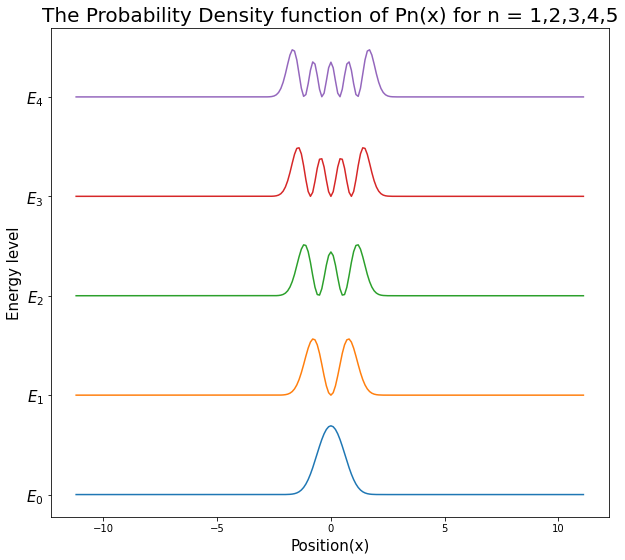

In [71]:
import matplotlib.pyplot as plt 
n=5 # number of state you want to plot 
space = 0.1

plt.figure(figsize=(10,9))
for i in range(0,n):
  plt.plot(x_array,(wf_list[:,i])**2 + i*space, label = rf"$E_{i}$")

plt.title("The Probability Density function of Pn(x) for n = 1,2,3,4,5",size=20)
plt.yticks([i*space for i in range(0,n)],[rf'$E_{i}$' for i in range(0,n)],size=15)
plt.xlabel("Position(x)",size=15)
plt.ylabel("Energy level",size=15)

### Part b)

The five lowest energy state are shown below, 

In [72]:
print("The 5 lowest eigen-energies are {E_list}".format(E_list = E_list[0:n]))

The 5 lowest eigen-energies are [0.6748936  2.27650742 4.20275923 6.28202362 8.49074909]


## Question 2 

It is required to use **Crank Nicolson Scheme** to numerically solve time-dependent Schrodinger equation 

i. Time range: [0,15). Timepoints $= (15-0)/dt = 500$

ii. x range: [-20,20]


In [73]:
# Initilize the constants 

hbar = m = 1 
x_0 = -10 
L = 40 
sigma = 1 
k_0 = 7
N = 401 # Number of points on the x axis 
dt = tau = 0.03
dx = h = 0.1  

time_point = int(15/0.03) 
x_array = np.linspace(-20,20,N)

The $\Psi_{list}$ is a matrix with $tp(row) \times N(column)$ dimension

In [74]:
psi_list=np.zeros((time_point,N),dtype=np.complex64) 
#print(psi_list.shape)

In [75]:
# Define the potential function 
def V(x):
  if (x>-3) and (x<3):
    return 0.5*(k_0**2)*np.cos(np.pi*x/6)
  else:
    return 0 

In [76]:
#build the potential V and H matrix 
matrix_H=np.zeros((N,N))

#first row
matrix_H[0,0]=(-(hbar*hbar)/(2*m))*(-2/np.power(h,2))
matrix_H[0,1]=(-(hbar*hbar)/(2*m))*(1/np.power(h,2))

#last row
matrix_H[N-1,N-1]=(-(hbar*hbar)/(2*m))*(-2/np.power(h,2))
matrix_H[N-1,N-2]=(-(hbar*hbar)/(2*m))*(1/np.power(h,2))

#other rows
for i,x in enumerate(x_array):
  if (i==0) or (i == len(x_array)-1):
    continue
  else:
    matrix_H[i,i]=(-(hbar*hbar)/(2*m))*(-2/np.power(h,2)) + V(x) # add the potential function here 
    matrix_H[i,i+1]=(-(hbar*hbar)/(2*m))*(1/np.power(h,2))
    matrix_H[i,i-1]=(-(hbar*hbar)/(2*m))*(1/np.power(h,2))

Then, we need to update the $\Psi_{list}$ by using $$\vec{\Psi_{n+1}} = (I+\frac{i\tau}{2\hbar}H)^{-1}(I-\frac{i\tau}{2\hbar}H)\vec{\Psi_{n}}$$ where $\tau =dt$.

In [77]:
const = (1j*dt)/(2*hbar)

matrix_inv_plus = np.linalg.inv(np.diag(np.ones(N),0) + const*matrix_H)
matrix_minus = np.diag(np.ones(N),0) - const*matrix_H

In [78]:
#set psi_0 (initial condition)
psi_list=np.zeros((time_point,N),dtype=np.complex64)
for i in range(N):
    psi_list[0,i]=(1/np.sqrt(sigma*np.sqrt(2*np.pi)))*np.exp((1j)*k_0*(x_array[i]-x_0))*np.exp(-0.5*np.power(x_array[i]-x_0,2)/(2*np.power(sigma,2)))

In [79]:
# Actual updating steps 
for i in range(1,time_point):
    psi_list[i]=np.dot(np.dot(matrix_inv_plus,matrix_minus),psi_list[i-1].reshape(N,1)).reshape(N,)

Show the screenshot and the animation

In [80]:
from matplotlib import rc
from matplotlib import animation

I set $k_0 = 1$ in the plot in order to match with the screen shot shown on the question. 

In [81]:
def V_array(x_array):
  V = []
  # Define the condition of potential function in this for loop 
  for x in x_array:
    if ((x<-3) or (x>3)):
      V.append(0)
    else:
      k0 = 1
      V.append(0.5*(k0**2)*np.cos(np.pi*x/6))
  return np.array(V) 

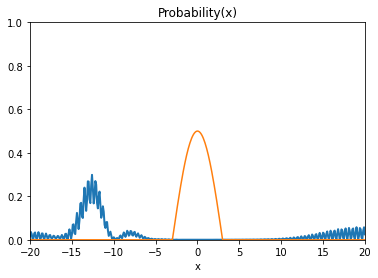

In [82]:
fig2, ax2 = plt.subplots()
line2, = ax2.plot([], [], lw=2)
plt.xlim(-20,20)
plt.ylim(0,1)
ax2.set_xlabel('x')
ax2.set_title('Probability(x)')

plt.plot(x_array,V_array(x_array)) 

jump = 2   
def animate2(i):
    xx=x_array
    yy=abs(psi_list[i*jump])**2 # i*jump here means we only show half of the data. frames in animation.FuncAnimation is therefore 500/2 = 250 
    line2.set_data(xx, yy)
    return (line2,)

anim2 = animation.FuncAnimation(fig2, animate2, frames=int(time_point/jump), interval=100, blit=True)
rc('animation', html='jshtml')
anim2

Below are the screen shot of when $\tau = 150$

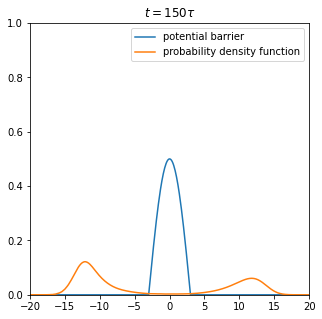

In [83]:
plt.figure(figsize=(5,5))
plt.plot(x_array,V_array(x_array),label="potential barrier")
plt.plot(x_array,abs(psi_list[150])**2 ,label="probability density function")
plt.xlim(-20,20)
plt.ylim(0,1)
plt.title(r'$t=150 \tau$')
plt.legend()

### Part b)

Probability density is 
$$ P(x,t) = \langle \Psi(x,t) | \Psi(x,t) \rangle = \int_{-\infty}^{\infty} \Psi^{*}\Psi dx = \int_{-\infty}^{\infty} |\Psi|^2 dx$$ in 1D case.

After discretization, the probability density at certain $t_0$ becomes
$$P(x,t_0) = \sum_{x} |\Psi(x,t_0)|^2 dx$$

**Therefore, I decide to use a for loop to goes through the $\Psi_{list}$ and calculate all the probability density function value.** 


Text(0, 0.5, 'probability density function value')

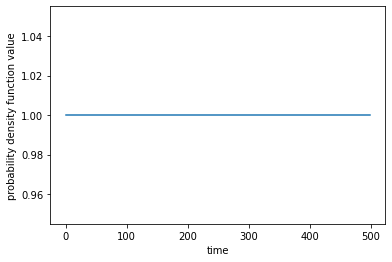

In [84]:
sum_list = []
time_list = []
for time, psi in enumerate(psi_list):
  sum1 = 0 
  for i in psi:
    sum1 += np.abs(i)**2
  sum_list.append(np.round(sum1,5)*dx)
  time_list.append(time)

plt.plot(time_list,sum_list)
plt.xlabel("time")
plt.ylabel("probability density function value")

As you can see from the output, after rounding to 5 decimal places, the value of probability density function is equal to 1 for time $0<t<15$ . 